# 数据的维度
维度是一组数据的组织形式

+ 一个数据表达一个含义
+ 一组数据可能是一个观测值，也可能是几个现象的几个观测值表示了多个含义，在理解一组数据的时候，需要知道这组数据表达含义的个数


## 一维数据
一维数据由**对等关系**的有序或无序数据构成,采用线性方式组织 --- 对应**列表**，数组和**集合**等概念。
- 数组的数据类型相同
- 列表的数据类型可以不同

## 二维数据(列表)
由多个一维数据构成，是一维数据的组合形式
## 多维数据(列表)
由一维或二维基础上拓展的
## 高维数据(字典)
仅使用最基本的二元关系组织起来数据间的复杂结构(键值对)。字典或数据表示格式JSON。

# Numpy(由C语言实现的，快)
Numpy是一个开源的Python科学计算库
- 一个强大的N维数组对象 -- ndarray
- 广播功能函数
- 整合C C++代码的工具
- 线代等功能

#### 为什么需要一个数组类型？我们已经有list了
e.g.: 计算A<sup>2</sup>+B<sup>3</sup>, A和B是一维数组
- 使用ndarray数组对象可以去掉元素间运算所需的循环，使一维向量更像**单个数据**。
- 并且这种专门的数组对象运算速度更快（C语言实现）
- 科学计算中，一个维度的所有数据类型往往是相同的， 数组对象有助于节省运算和存储空间



1. 用list

In [5]:
def pySum():
    a = [0,1,2,3,4]
    b = [9,8,7,6,5]
    c = []
    for i in range(len(a)):
        c.append(a[i]**2+b[i]**3)   
    return c
print(pySum())

[729, 513, 347, 225, 141]


2. 用Numpy

In [3]:
import numpy as np # 俗称约定
def npSum():
    a = np.array([0,1,2,3,4])
    b = np.array([9,8,7,6,5])
    c = a**2 + b**3
    return c
print(npSum())

[729 513 347 225 141]


## N-dimension object：ndarray
Multiple dimensions object, two componets:
1. real data
2. 表述这些data的元数据(dimension，data type)
一般要求数组的所有元素类型相同，数组下标从0开始。

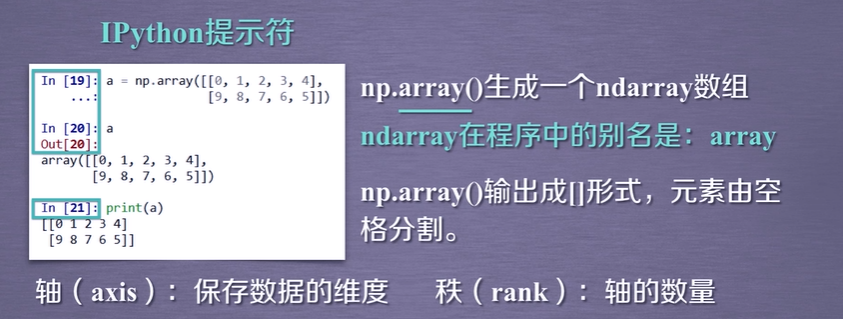

### ndarray的属性
|  attribute   | instruction  |
|  :----:  | :----:  |
| .ndim  | 秩(rank):轴的数量 |
| .shape  | ndarray对象的尺度，对于矩阵，n行m列 |
| .size | ndarray对象的元素个数。相当于.shape中n\*m的值 |
| .dtype | ndarray对象的元素类型 |
| .itemsize | ndarray对象中每个元素的大小，以byte为单位 |

#### ndarray具有许多数据类型（.dtype）
Python仅支持int,float,complex三种data type
- 科学计算设计数据较多，对存储和性能有较高的要求。
- 对元素类型精细定义，有助于Numpy合理使用存储空间，优化性能。
- 对元素类型精细定义，有助于程序员对程序规模有合理评估。
#### 尽量避免使用不同数据类型组成的ndarray object

In [8]:
a = np.array([[0,1,2,3,4],
              [9,8,7,6,5]])
print(a.ndim)
print(a.shape)
print(a.size)
print(a.dtype) #int32是Numpy定义的元素类型：32位长的整数
print(a.itemsize)

2
(2, 5)
10
int32
4


## ndarray数组的创建和变换
### ndarray的创建方法
- 从Python中的list，tuple等data type to creat ndarray 
- Use Numpy's function e.g. arrange, ones, zeros..
- 从字节流(raw bytes)中创建ndarray数组
- 从文件中读取特定格式

#### 1. 用list,tuple等类型创建
x = np.array(list/tuple)  
x = np.array(list/tuple,dtype = np.float32)  
当np.array()不指定dtype时，Numpy将根据数据情况关联一个dtype类型

In [14]:
x = np.array([0,1,2,3]) #列表创建
print(x)
x = np.array((1,2,3)) #tuple creat
print(x)
x = np.array([[1,2],[0,9],(0.1,0.2)]) #混合创建
print(x)
x

[0 1 2 3]
[1 2 3]
[[1.  2. ]
 [0.  9. ]
 [0.1 0.2]]


array([[1. , 2. ],
       [0. , 9. ],
       [0.1, 0.2]])

#### 2. 使用Numpy中的function创建
|  function   | instruction  |
|  :----:  | :----:  |
| np.arrange(n) | 类似range(),return ndarray类型，元素从0到n-1 |
| np.ones(shape)  | 根据shape生成一个全1数组，shape是元组类型 |
| np.zeros(shape) | 根据shape生成一个全0数组，shape是元组类型 |
| np.full(shape,val) | 根据shape生成一个数组,每个元素值都是val |
| np.eye(n) | 创建一个正方形的n\*n单位矩阵，对角线为1，其余为0 |

In [11]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
np.ones((3,6))

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [16]:
np.zeros((3,6),dtype=np.int32)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [17]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [21]:
x = np.ones((2,3,4))
x

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

In [22]:
x.shape #最外层中有两个元素，每个元素3个维度，每个维度4个元素

(2, 3, 4)

|  function   | instruction  |
|  :----:  | :----:  |
| np.ones_like(a) | 根据数组a的形状生成一个全1数组 |
| np.zeros_like(a)  | 根据数组a的形状生成一个全0数组 |
| np.full_like(a,val) | 根据数组a的形状生成一个数组，每个元素值都是va|

#### 科学计算中常用
|  function   | instruction  |
|  :----:  | :----:  |
| np.linspace() | 根据起止数据等间距地填充数据形成数组 |
| np.concatenate()  | 将两个或多个数组合并成一个新的数组 |


In [23]:
a = np.linspace(1,10,4)
a

array([ 1.,  4.,  7., 10.])

In [27]:
b = np.linspace(1,10,4,endpoint=False) #10是否是生成的元素中的一个
b

array([1.  , 3.25, 5.5 , 7.75])

In [28]:
c = np.concatenate((a,b))
c

array([1.  , 3.25, 5.5 , 7.75, 1.  , 3.25, 5.5 , 7.75])

### ndarray数组的变换
对于创建后的ndarray数组，可以对其进行维度变换和元素类型变换。  
a = np.ones((1,2,3),dtype=np.int32)

|  function   | instruction  |
|  :----:  | :----:  |
| .reshape(shape) | 不改变数组元素，返回一个shape形状的数组，`原数组不变` |
| .resize(shape)  | 与.reshape()相同，但改变原数组 |
| .swapaxes(ax1,ax2) | 数组n个维度中的两个维度进行调换 |
| .flatten() | 对数组进行降维，返回折叠后的一维数组，`原数组不变` |
| .astype(new_type) | 改变原来数组的类型，产生一个新数组 |
| .tolist() | 数组向列表转换 |

In [31]:
a = np.ones((2,3,4),dtype=np.int32)
print(a)
a.reshape((3,8))

[[[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]

 [[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]]


array([[1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1]])

In [32]:
a # 原数组不变

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]])

In [34]:
a.resize((3,8))
a

array([[1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1]])

In [36]:
a.flatten()#原数组不变，降维成1维

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [41]:
a = np.ones((2,3,4),dtype=np.int)
a

<ipython-input-41-0efcf597be98>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.ones((2,3,4),dtype=np.int)


array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]])

In [40]:
b = a.astype(np.float)
b

<ipython-input-40-ee378cdd4ed9>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  b = a.astype(np.float)


array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

In [42]:
b.tolist()

[[[1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0]],
 [[1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0]]]

## ndarray操作
### 数组的索引和切片
- 一维数组的索引切片（与列表类似）

In [45]:
a = np.array([1,2,3,4])
print(a[2])
print(a[1:4:2]) #起始编号：终止编号（不包括）：步长

3
[2 4]


- 多维数组的索引和切片

In [47]:
a = np.arange(24).reshape((2,3,4))
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [49]:
print(a[1,2,3])
print(a[0,1,2])
print(a[-1,-2,-3])

23
6
17


In [53]:
print(a[:,1,-3])  
print(a[:,1:3,:])
print(a[:,:,::2])

[ 5 17]
[[[ 4  5  6  7]
  [ 8  9 10 11]]

 [[16 17 18 19]
  [20 21 22 23]]]
[[[ 0  2]
  [ 4  6]
  [ 8 10]]

 [[12 14]
  [16 18]
  [20 22]]]


## ndarray数组的运算
### 数组与标量（one data）之间的运算作用于数组的每一个元素
数组的每一个item都与这个数运算

In [56]:
a = np.arange(24).reshape((2,3,4))
a.mean()

11.5

In [59]:
a = a/a.mean() #每一个元素都与标量运算
a  

array([[[0.        , 0.08695652, 0.17391304, 0.26086957],
        [0.34782609, 0.43478261, 0.52173913, 0.60869565],
        [0.69565217, 0.7826087 , 0.86956522, 0.95652174]],

       [[1.04347826, 1.13043478, 1.2173913 , 1.30434783],
        [1.39130435, 1.47826087, 1.56521739, 1.65217391],
        [1.73913043, 1.82608696, 1.91304348, 2.        ]]])

### Numpy一元函数(不改变原函数，如需使用要赋值)
|  function   | instruction  |
|  :----:  | :----:  |
| np.abs(x) np.fabs(x) | 计算数组各元素的绝对值 |
| np.sqrt(x)  | 计算数组各元素的平方根 |
| np.square(x) | 计算数组各元素的平方 |
| np.log(x) np.log10(x) | 计算数组各个元素对数 |
| np.ceil(x) np.floor(x) | 计算数组各元素的ceiling值或floor |
| np.rint(x) | 计算数组各元素的四舍五入值 |
| np.modf(x) | 将数组的各元素小数和整数部分以两个独立数组形式返回 |
| np.cos()... | 计算数组各元素的三角函数 |
| np.exp(x) | 计算数组各元素的指数值 |
| np.sign(x) | 计算数组各元素的符号值，1(+),0,-1(-) |

ceiling向上取整，floor向下取整
